This script models transient behavior of a rod at constant T put between two heat reservoirs at different temperatures, again T1 = 100, and T2 = 200. The rod will start at 150. Over time, we should expect a solution that approaches the steady state solution: a linear temperature profile from one side of the rod to the other.

$\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}$

at $t=0$, in this example we have $u_0(x) = 150$ as an initial condition. with boundary conditions $u(0,t)=100$ and $u(L,t)=200$.

There is not yet a PDE solver in scipy. Instead, we will utilze the method of lines to solve this problem. We discretize the rod into segments, and approximate the second derivative in the spatial dimension as $\frac{\partial^2 u}{\partial x^2} = (u(x + h) - 2 u(x) + u(x-h))/ h^2$ at each node. This leads to a set of coupled ordinary differential equations that is easy to solve.

Let us say the rod has a length of $L=1$, $k=0.02$, and solve for the time-dependent temperature profiles.

In [25]:
# Import libraries

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import PIL.Image
import glob
import subprocess
from IPython.display import Image

In [2]:
# Define dimensions and points to discretize for integration

N = 100  # number of points to discretize
L = 1.0
X = np.linspace(0, L, N) # position along the rod
h = L / (N - 1)

k = 0.02

In [3]:
def odefunc(u, t):
    '''
    First derivative of energy balance on temperature u: du/dt based on discretizing the rod into segments 
    and approximating the 2nd derivative.
    '''
    dudt = np.zeros(X.shape)

    dudt[0] = 0 # constant at boundary condition
    dudt[-1] = 0

    # now for the internal nodes
    for i in range(1, N-1):
        dudt[i] = k * (u[i + 1] - 2*u[i] + u[i - 1]) / h**2

    return dudt

In [4]:
# Solve ODE system

init = 150.0 * np.ones(X.shape) # initial temperature
init[0] = 100.0  # one boundary condition
init[-1] = 200.0 # the other boundary condition

tspan = np.linspace(0.0, 5.0, 100)
sol = odeint(odefunc, init, tspan)

### Plots

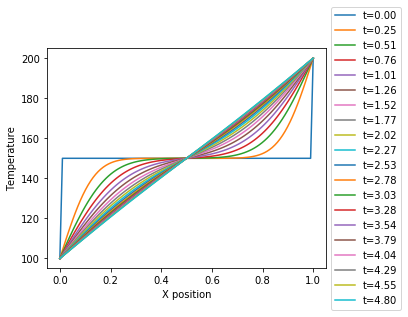

In [5]:
# 2D plot

for i in range(0, len(tspan), 5):
    plt.plot(X, sol[i], label='t={0:1.2f}'.format(tspan[i]))

# put legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X position')
plt.ylabel('Temperature')

# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)
plt.savefig('pde-transient-heat-1.png')

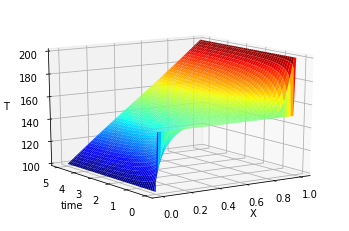

In [6]:
# 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(X, tspan)
ax.plot_surface(SX, ST, sol, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('T')
ax.view_init(elev=15, azim=-124) # adjust view so it is easy to see
plt.savefig('pde-transient-heat-3d.png')


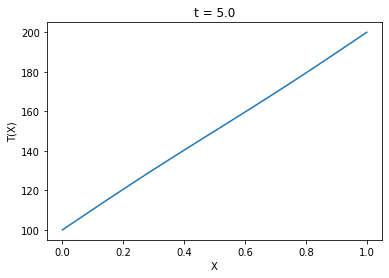

In [21]:
# Animated solution. We will use imagemagick for this

# We save each frame as an image, and use the imagemagick convert command to 
# make an animated gif
for i in range(len(tspan)):
    plt.clf()
    plt.plot(X, sol[i])
    plt.xlabel('X')
    plt.ylabel('T(X)')
    plt.title('t = {0}'.format(tspan[i]))
    plt.savefig('___t{0:03d}.png'.format(i))

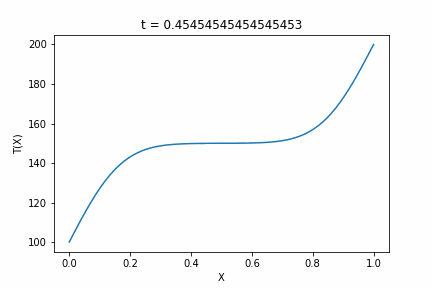

In [28]:
# Generate gif from temp files
# process = subprocess.Popen(['convert', '-quality 100', '___t*.png transient_heat.gif'],
#                      stdout=subprocess.PIPE, 
#                      stderr=subprocess.PIPE)
# stdout, stderr = process.communicate()
# print(stdout, stderr)


 
# Select the frames from previously generated .png files 
frames = []
imgs = glob.glob("___t*.png")
for i in imgs:
    new_frame = PIL.Image.open(i)
    frames.append(new_frame)
 
# Save into a GIF file that loops forever
frames[0].save('heat_transfer_animation.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)


# # Remove temp files
# process = subprocess.call('rm ___t*.png', shell=True)

with open('heat_transfer_animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))